In [19]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [20]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [22]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [23]:
#inspect the engine
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [24]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [25]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [26]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [38]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [28]:
columns = inspector.get_columns('measurement')
print('Measurement columns')
for c in columns:
    print(c['name'], c["type"])

print('-'*60)

columns2 = inspector.get_columns('station')
print('Station columns')
for q in columns2:
    print(q['name'], q['type'])

Measurement columns
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
------------------------------------------------------------
Station columns
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [29]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23')

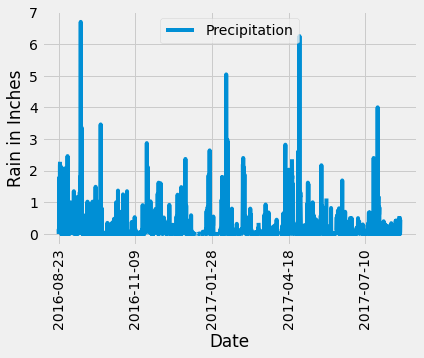

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date columns
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

selection = [measurement.prcp,
            measurement.date]
sub_one_year = dt.date(2017,8,23) - dt.timedelta(days= 365)
precip_data = session.query(*selection).\
            filter(measurement.date >= sub_one_year).\
            order_by(measurement.date).all()

precipitation_frame = pd.DataFrame(precip_data, columns =['Precipitation','Date'])
precipitation_frame.sort_values('Date')
precipitation_frame.plot(x = 'Date', y = 'Precipitation', rot = 90)
plt.xlabel('Date')
plt.ylabel('Rain in Inches')
plt.show()




In [31]:
precip_data

[(0.0, '2016-08-23'),
 (0.15, '2016-08-23'),
 (0.05, '2016-08-23'),
 (None, '2016-08-23'),
 (0.02, '2016-08-23'),
 (1.79, '2016-08-23'),
 (0.7, '2016-08-23'),
 (0.08, '2016-08-24'),
 (2.15, '2016-08-24'),
 (2.28, '2016-08-24'),
 (None, '2016-08-24'),
 (1.22, '2016-08-24'),
 (2.15, '2016-08-24'),
 (1.45, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.21, '2016-08-25'),
 (0.06, '2016-08-25'),
 (0.11, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.03, '2016-08-26'),
 (0.02, '2016-08-26'),
 (0.04, '2016-08-26'),
 (0.0, '2016-08-26'),
 (0.01, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.18, '2016-08-27'),
 (0.02, '2016-08-27'),
 (0.0, '2016-08-27'),
 (0.12, '2016-08-27'),
 (None, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.6, '2016-08-28'),
 (2.07, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.17, '2016-08-29'),
 (0.04, '2016-08-29'),
 (None, '2016-08-29'),
 (0.0, '2016-08-29'),

In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_frame.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [33]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(station.station).count()
station_count


9

In [34]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
stat = [measurement.station,
       func.count(measurement.station)]
active_stations = session.query(*stat).\
                group_by(measurement.station).\
                order_by(func.count(measurement.station).desc()).all()
# List the stations and the counts in descending order.
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [35]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
###the most active station is USC00519281 (Has the greatest number of observations)

temps = [measurement.station,
        func.max(measurement.tobs),
        func.min(measurement.tobs),
        func.avg(measurement.tobs)]

temp_station = session.query(*temps).\
            filter (measurement.station == 'USC00519281').all()

temp_station

[('USC00519281', 85.0, 54.0, 71.66378066378067)]

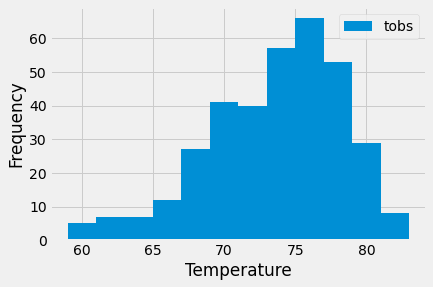

In [36]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs_pastyear = session.query(measurement.date,measurement.tobs).\
            filter (measurement.station == 'USC00519281').filter(measurement.date >= sub_one_year).\
            order_by(measurement.date).all()

pastyear_temps = pd.DataFrame(temp_obs_pastyear, columns = ['Date','tobs'])
pastyear_temps.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.show()

# Close session

In [37]:
# Close Session
session.close()